In [373]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, validation_curve, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import export_graphviz
from sklearn import metrics
from matplotlib import pyplot as plt
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint
import warnings
from pprint import pprint
warnings.filterwarnings('ignore')


%matplotlib inline

In [374]:
df = pd.read_csv('ptrain.csv',sep = ',')
pd.set_option('display.max_columns', 50)
df = df.fillna(0)


In [375]:
y = df['ACTIVITY_DEC_16']
df.drop(['ACTIVITY_DEC_16'], axis=1, inplace=True)
X = df.copy()

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [377]:
searchScores = []
searchCVScores = []

In [378]:
clf_dt = DecisionTreeClassifier(   
    criterion='entropy', 
    max_depth=5, 
    min_samples_split=3,
    min_samples_leaf=13, 
    max_features=None, 
    random_state=42
 )



In [379]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=13, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [380]:
y_tree_probability = clf_dt.predict_proba(X_test)[:,1]
y_tree_predict = clf_dt.predict(X_test)
# Check metrics
print(metrics.classification_report(y_test, y_tree_predict))
# Check ROC-AUC score

searchScores.append(metrics.roc_auc_score(y_test, y_tree_probability))
searchScores[-1]

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2715
           1       0.94      0.95      0.95      6048

    accuracy                           0.92      8763
   macro avg       0.91      0.91      0.91      8763
weighted avg       0.92      0.92      0.92      8763



0.9695350334220041

In [381]:
# model_params = {
#     'min_samples_leaf': randint(1,30),
#     'max_depth': randint(1,28),
#     'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1)  
# }
# clf_dt = DecisionTreeClassifier()
# clf = RandomizedSearchCV(clf_dt, model_params, n_iter=100, cv=5, random_state=1, n_jobs=-1)
# model = clf.fit(X_train, y_train)

In [382]:
# pprint(model.best_estimator_.get_params())

In [383]:
clf_dt_s = DecisionTreeClassifier(   
    criterion='entropy', 
    max_depth=27, 
    min_samples_split=2,
    min_samples_leaf=14, 
    max_features=None,
    random_state=42
 )


In [384]:
clf_dt_s.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=27,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=14, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [385]:
y_tree_probability = clf_dt_s.predict_proba(X_test)[:,1]
y_tree_predict = clf_dt_s.predict(X_test)
# Check metrics
print(metrics.classification_report(y_test, y_tree_predict))
# Check ROC-AUC score
searchCVScores.append(metrics.roc_auc_score(y_test, y_tree_probability))
searchCVScores[-1]

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      2715
           1       0.93      0.95      0.94      6048

    accuracy                           0.92      8763
   macro avg       0.91      0.90      0.90      8763
weighted avg       0.92      0.92      0.92      8763



0.9574186434856324

In [386]:
clf_rf = RandomForestClassifier(
    n_estimators=100, 
    criterion='entropy',     
    max_depth=None, 
    min_samples_split=2,
    min_samples_leaf=7, 
    max_features='sqrt',
    bootstrap=True, 
    n_jobs=-1,
    max_leaf_nodes=29,
    random_state=42
       
)

In [387]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=29,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [388]:
y_tree_probability = clf_rf.predict_proba(X_test)[:,1]
y_rf_predict = clf_rf.predict(X_test)

# Check metrics
print(metrics.classification_report(y_test, y_rf_predict))

# Check ROC-AUC score
searchScores.append(metrics.roc_auc_score(y_test, y_tree_probability))
searchScores[-1]

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2715
           1       0.94      0.95      0.95      6048

    accuracy                           0.92      8763
   macro avg       0.91      0.91      0.91      8763
weighted avg       0.92      0.92      0.92      8763



0.9726327197033918

In [389]:
# model_params = {
#     'n_estimators': randint(4, 100),
#     'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
#     'max_leaf_nodes': randint(2, 40),
#     'min_samples_leaf': randint(2, 15),
#     'random_state': randint(35,43)
# }
# clf_rf = RandomForestClassifier()
# clf = RandomizedSearchCV(clf_rf, model_params, n_iter=80, cv=5, random_state=1, n_jobs=-1)
# model = clf.fit(X_train, y_train)


In [390]:
# pprint(model.best_estimator_.get_params())

In [391]:
clf_rf_s = RandomForestClassifier(
    n_estimators=79,
    criterion='gini',
    max_depth=None,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=0.2864742729236049,
    max_leaf_nodes=14,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=40,
    verbose=0,
    warm_start=True,
    class_weight=None
)

In [392]:
clf_rf_s.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.2864742729236049,
                       max_leaf_nodes=14, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=79, n_jobs=-1, oob_score=False,
                       random_state=40, verbose=0, warm_start=True)

In [393]:
y_tree_probability = clf_rf_s.predict_proba(X_test)[:,1]
y_rf_predict = clf_rf_s.predict(X_test)

# Check metrics
print(metrics.classification_report(y_test, y_rf_predict))

# Check ROC-AUC score
searchCVScores.append(metrics.roc_auc_score(y_test, y_tree_probability))
searchCVScores[-1]

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      2715
           1       0.94      0.95      0.95      6048

    accuracy                           0.92      8763
   macro avg       0.92      0.91      0.91      8763
weighted avg       0.92      0.92      0.92      8763



0.9709039166106384

In [394]:
clf_et = ExtraTreesClassifier(
    n_estimators=180,
    criterion='gini',
    max_depth=None,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=3,
    verbose=0,
    warm_start=False,
    class_weight=None
)

In [395]:
clf_et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=-1,
                     oob_score=False, random_state=3, verbose=0,
                     warm_start=False)

In [396]:
y_tree_probability = clf_et.predict_proba(X_test)[:,1]
y_v_predict = clf_et.predict(X_test)

# Check metrics
print(metrics.classification_report(y_test, y_v_predict))

# Check ROC-AUC score
searchScores.append(metrics.roc_auc_score(y_test, y_tree_probability))
searchScores[-1]

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      2715
           1       0.93      0.95      0.94      6048

    accuracy                           0.92      8763
   macro avg       0.91      0.90      0.90      8763
weighted avg       0.92      0.92      0.92      8763



0.9695676759040017

In [397]:
# model_params = {
#     'n_estimators': randint(4, 200),
#     'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
#     'max_leaf_nodes': randint(2, 40),
#     'min_samples_leaf': randint(2, 15),
#     'random_state': randint(35,43)
# }
# clf_et = ExtraTreesClassifier()
# clf = RandomizedSearchCV(clf_et, model_params, n_iter=100, cv=5, random_state=1, n_jobs=-1)
# model = clf.fit(X_train, y_train)

In [398]:
# pprint(model.best_estimator_.get_params())

In [399]:
clf_et_s = ExtraTreesClassifier(
    n_estimators=79,
    criterion='gini',
    max_depth=None,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features=0.30089011967049445,
    max_leaf_nodes=16,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=38,
    verbose=0,
    warm_start=True,
    class_weight=None
)

In [400]:
clf_et_s.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
                     max_depth=None, max_features=0.30089011967049445,
                     max_leaf_nodes=16, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=2,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=79, n_jobs=-1, oob_score=False,
                     random_state=38, verbose=0, warm_start=True)

In [401]:
y_tree_probability = clf_et_s.predict_proba(X_test)[:,1]
y_v_predict = clf_et_s.predict(X_test)

# Check metrics
print(metrics.classification_report(y_test, y_v_predict))

# Check ROC-AUC score
searchCVScores.append(metrics.roc_auc_score(y_test, y_tree_probability))
searchCVScores[-1]

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      2715
           1       0.92      0.95      0.93      6048

    accuracy                           0.90      8763
   macro avg       0.89      0.88      0.88      8763
weighted avg       0.90      0.90      0.90      8763



0.9596129368976973

In [402]:
clf_v = VotingClassifier(
    estimators=[('rf', clf_rf), 
                ('et', clf_et), 
                ('dt', clf_dt)], 
    voting='soft', 
    n_jobs=-1)

In [403]:
clf_v.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=29,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=7,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=-1, oob_score=F

In [404]:
y_tree_probability = clf_v.predict_proba(X_test)[:,1]
y_v_predict = clf_v.predict(X_test)

# Check metrics
print(metrics.classification_report(y_test, y_v_predict))

# Check ROC-AUC score
searchScores.append(metrics.roc_auc_score(y_test, y_tree_probability))
searchScores[-1]

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2715
           1       0.94      0.95      0.95      6048

    accuracy                           0.93      8763
   macro avg       0.92      0.91      0.91      8763
weighted avg       0.93      0.93      0.93      8763



0.9735749973203933

In [405]:
clf_v_s = VotingClassifier(
    estimators=[('rf', clf_rf_s), 
                ('et', clf_et_s), 
                ('dt', clf_dt_s)], 
    voting='soft', 
    n_jobs=-1)

In [406]:
clf_v_s.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=0.2864742729236049,
                                                     max_leaf_nodes=14,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=10,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=79, n_jobs=-1,
                                                     oo

In [407]:
y_tree_probability = clf_v_s.predict_proba(X_test)[:,1]
y_v_predict = clf_v_s.predict(X_test)

# Check metrics
print(metrics.classification_report(y_test, y_v_predict))

# Check ROC-AUC score
searchCVScores.append(metrics.roc_auc_score(y_test, y_tree_probability))
searchCVScores[-1]

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      2715
           1       0.93      0.96      0.94      6048

    accuracy                           0.92      8763
   macro avg       0.91      0.90      0.91      8763
weighted avg       0.92      0.92      0.92      8763



0.9714233644654916

In [408]:
print(searchScores)
print(searchCVScores)

for i in range(len(searchScores)):
    searchScores[i] = (1-searchScores[i])*100
    searchCVScores[i]= (1-searchCVScores[i])*100



[0.9695350334220041, 0.9726327197033918, 0.9695676759040017, 0.9735749973203933]
[0.9574186434856324, 0.9709039166106384, 0.9596129368976973, 0.9714233644654916]


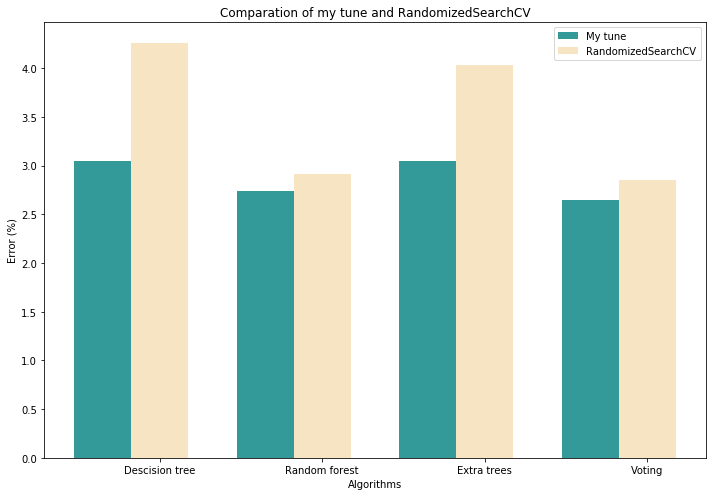

In [411]:
n_groups = 4

fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

my_search = plt.bar(
    index, 
    searchScores, 
    bar_width,
    alpha=opacity,
    color='teal',
    label='My tune'
)

searchCV = plt.bar(
    index + bar_width, 
    searchCVScores, 
    bar_width,
    alpha=opacity,
    color='wheat',
    label='RandomizedSearchCV'
)
    
plt.xlabel('Algorithms')
plt.ylabel('Error (%)')
plt.title('Comparation of my tune and RandomizedSearchCV')
plt.xticks(index + bar_width, ('Descision tree', 'Random forest', 'Extra trees', 'Voting'))
plt.legend()

plt.tight_layout()
plt.show()

Here you can see score comparation of my hyperparameter setting and RandomizedSearchCV setting of some classification tree algorithms. I can say that my tuning have become more effective than RandomizedSearchCV methods. This is largely due to the fact that I couldn't iterate over all parameters because of insufficient computing power of my laptop. So I've chosen only a few of them.

As you can see on charts, Descision Tree Classifier appears to be the weakest algorithm and the most effective is Voting. However the difference is small and it suggests that they can be equally well used with carefully selected hyperparameters.